In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data

--2019-02-25 13:17:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7297 (7.1K) [text/plain]
Saving to: ‘bupa.data’

bupa.data           100%[=====================>]   7.13K  --.-KB/s   in 0s     

2019-02-25 13:17:32 (100 MB/s) - ‘bupa.data’ saved [7297/7297]



In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 

In [3]:
col_names = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector']

Df = pd.read_csv('bupa.data', sep = ',' , names=col_names)

Df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [14]:
print(set(Df['selector']))

{1, 2}


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
mcv         345 non-null int64
alkphos     345 non-null int64
sgpt        345 non-null int64
sgot        345 non-null int64
gammagt     345 non-null int64
drinks      345 non-null float64
selector    345 non-null int64
dtypes: float64(1), int64(6)
memory usage: 18.9 KB


In [5]:
Df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [7]:
Df.isna().any()

mcv         False
alkphos     False
sgpt        False
sgot        False
gammagt     False
drinks      False
selector    False
dtype: bool

In [8]:
Df.isnull().any()

mcv         False
alkphos     False
sgpt        False
sgot        False
gammagt     False
drinks      False
selector    False
dtype: bool

Data has no Null values , no NA values , no missing . lets get features out of it

In [10]:
X = Df.iloc[:,:6].values.astype(np.float32)
Y = Df.iloc[:,6].values.astype(np.int32)

In [11]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X,Y , test_size = 0.25 , random_state = 2)

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(258, 6)
(87, 6)
(258,)
(87,)


Standard Scaling the data 

In [20]:
from sklearn.preprocessing import StandardScaler

Scale = StandardScaler()

Xtrain = Scale.fit_transform(Xtrain)
Xtest = Scale.transform(Xtest)

Creating model 

In [21]:
from sklearn.svm import SVC 

model = SVC(C=1.0 , kernel='rbf')

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.632183908045977


Visualize the outputs 

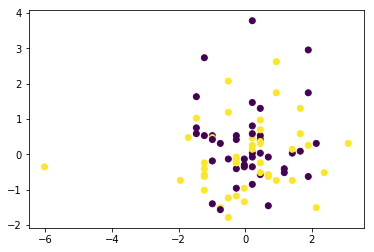

In [22]:
plt.scatter(Xtest[:,0] , Xtest[:,1] , c = Ytest)
plt.show()

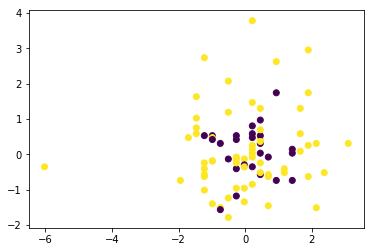

In [23]:
plt.scatter(Xtest[:,0] , Xtest[:,1] , c = Ypred)
plt.show()

Check 1 

In [24]:
from sklearn.svm import SVC 

model = SVC(C=2.0 , kernel='rbf')

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.6436781609195402


In [25]:
from sklearn.svm import SVC 

model = SVC(C=3.0 , kernel='rbf')

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.6436781609195402


In [26]:
from sklearn.svm import SVC 

model = SVC(C=4.0 , kernel='rbf')

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.632183908045977


In [27]:
from sklearn.svm import SVC 

model = SVC(C=5.0 , kernel='rbf')

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.6206896551724138


In [28]:
from sklearn.svm import SVC 

model = SVC(C=6.0 , kernel='rbf')

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.6091954022988506


In [29]:
from sklearn.svm import SVC 

model = SVC(C=7.0 , kernel='rbf')

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.6206896551724138


In [30]:
from sklearn.svm import SVC 

model = SVC(C=8.0 , kernel='rbf')

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.632183908045977


In [31]:
from sklearn.svm import SVC 

model = SVC(C=9.0 , kernel='rbf')

model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print(" Accuracy : " , model.score(Xtest , Ytest))

 Accuracy :  0.632183908045977


The best possible accuracy was 64.3